# Can Data Diagnose Heart Disease Better Than Doctors?

By: Edward Zou, Hui Lin Shan, Reimi Shishido, and Emma Lo (Group 45)

## Introduction:

*Provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your proposal*

- Heart disease refers to several cardiovascular conditions that, due to a narrowing of major arteries causing restricted blood flow, can fatally affect the structure and function of the heart. Research shows that heart disease usually affects men at twice the rate as it affects women and is the second leading cause of death in Canada, yet misdiagnosis still occurs 16%-68% of the time(depending on setting). Therefore, finding more reliable ways of diagnosis will be beneficial to all humans. Our group’s goal is to try and identify if an individual has heart disease by comparing their attributes to attributes of patients confirmed to have heart disease.


*Clearly state the question you will try to answer with your project*

- Can we use a heart disease dataset to create a model that can reliably predict whether an individual has heart disease to a higher percentage of correctness than 84%? 84% is chosen because greater than 16% of cases are misdiagnosed, therefore, 84% is correctly diagnosed, and that is the number we want to surpass with our project to help better diagnose heart diseases. 


*Identify and describe the dataset that will be used to answer the question*

- We will be using the heart disease dataset provided on Canvas (processed Cleveland version) of the UCI Machine Learning Repository. This specific dataset consists of 14 attributes (taken from a larger collection of 76 attributes) that aid in predicting whether or not an individual has heart disease. There were datasets from four different institutions (Cleveland, Hungary, Switzerland, and VA Long Beach) provided, but we chose the Cleveland data because the Cleveland data set was the only data set that has been used by ML researchers. Therefore, we believe this means it can potentially be the best dataset with the most helpful observations to ensure our model is the most effective it can be. We chose to use the processed dataset because the removed columns from the unprocessed datasets appeared to be not significant (have little correlation with predicting heart disease).

## Preliminary exploratory data analysis:
*Demonstrate that the dataset can be read from the web into R*

- We loaded in libraries we used in class that we believe may be helpful for wrangling and visualizing our data. After previewing the full dataset, we noticed it was comma separated so we were able to download and read the file from the web into R using the read_csv function and the dataset’s url address.

*Clean and wrangle your data into a tidy format*

- To make our data tidy, we noticed the column did not have headers so we renamed the columns using the attribute information provided on the website we extracted the data set from. We extracted cholesterol and resting blood pressure because these were the predictors we will use since our initial research online suggests these are key factors that have the most influence when predicting or diagnosing heart disease. We also kept columns with the diagnosis of heart disease (which is our target variable) and the column with the sex of each individual–because we believe that different genders may have different levels of healthy cholseterol, normal resting blood pressure, and susceptibility to illnesses, so heart disease symptoms may present themselves differently based on gender. Finally, we recoded the last column with heart disease diagnoses (where values of 1,2,3, and 4 means they do have heart disease, and 0 means they do not) so that they were factors that correlated to their diagnosis to make later visualizations and data processing easier and more understandable (ie. do not need to reference back what it means to have a diagnosis of 1). Our data set is now tidy because every column represents a variable (blood pressure, cholesterol, age sex, etc.), and every row is one observation (one individual’s information).

In [1]:
library(tidyverse)
library(digest)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [2]:
cleveland <- read_csv(url("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"), col_names = FALSE) |>
    rename(age = X1, sex = X2, chest_pain = X3, resting_blood_pressure = X4,
           cholesterol = X5, fast_blood_sugar = X6, resting_electrocardiographic_results = X7,
           maximum_heart_rate_achieved = X8, exercise_induced_angina = X9,
           ST_depression_induced_by_exercise_relative_to_rest = X10, 
           the_slope_of_the_peak_exercise_ST_segment = X11, 
           number_of_major_vessels_colored_by_flourosopy = X12, thalassemia = X13,
           diagnosis_of_heart_disease = X14) |>
    select(sex, cholesterol, resting_blood_pressure, diagnosis_of_heart_disease) |>
    mutate(diagnosis_of_heart_disease = as_factor(diagnosis_of_heart_disease),
                diagnosis_of_heart_disease = recode(diagnosis_of_heart_disease, 
                                                    "0" = "No", 
                                                    "1" = "Yes",
                                                    "2" = "Yes",
                                                    "3" = "Yes",
                                                    "4" = "Yes"))
cleveland

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


sex,cholesterol,resting_blood_pressure,diagnosis_of_heart_disease
<dbl>,<dbl>,<dbl>,<fct>
1,233,145,No
1,286,160,Yes
1,229,120,Yes
⋮,⋮,⋮,⋮
1,131,130,Yes
0,236,130,Yes
1,175,138,No


*Using only training data, summarize the data in at least one table (this is exploratory data analysis). An example of a useful table could be one that reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data*

- We split our data with a 70% training data and 30% testing data split, because we believe this would be a good split for initial observations that would have enough data to train a model on as well as enough data to test our model’s accuracy, and we could test with different models later to see if this is the optimal split. The useful table we made reports the means of cholesterol and blood pressure for each gender male and female, so that we have an idea of what the average levels for each are. This table demonstrates that males and females have different averages which suggests we should create different models for males and females to diagnose heart disease due to differences in health. The two tibbles below represent how many observations there are for each gender, and shows there are far more observations for males which means the accuracy of the model we will make for females may not be as accurate due to less data to train on and should be considered in any conclusions we make.

In [3]:
male_data <- cleveland |>
        filter(sex == 1)

female_data <- cleveland |>
        filter(sex == 0)

cholesterol_average_male <- male_data |>
        summarize(cholesterol = mean(cholesterol))

cholesterol_average_female <- female_data |>
        summarize(cholesterol = mean(cholesterol))


resting_blood_pressure_average_male <- male_data |>
        summarize(resting_blood_pressure = mean(resting_blood_pressure))

resting_blood_pressure_average_female <- female_data |>
        summarize(resting_blood_pressure = mean(resting_blood_pressure))

average_table <- data.frame(X1 = cholesterol_average_male,
                            X2 = cholesterol_average_female,
                            X3 = resting_blood_pressure_average_male,
                            X4 = resting_blood_pressure_average_female) |>
        rename(male_cholesterol_average = cholesterol, female_cholesterol_average = cholesterol.1,
               male_resting_blood_pressure_average = resting_blood_pressure,
               female_resting_blood_pressure_average = resting_blood_pressure.1,)

#male_data
#female_data
#cholesterol_average_male
#cholesterol_average_female
#resting_blood_pressure_average_male
#resting_blood_pressure_average_female
average_table

male_count <- male_data |>
        summarize(number_of_male_observations = n())

female_count <- female_data |>
        summarize(number_of_female_observations = n())

male_count
female_count

male_cholesterol_average,female_cholesterol_average,male_resting_blood_pressure_average,female_resting_blood_pressure_average
<dbl>,<dbl>,<dbl>,<dbl>
239.6019,261.7526,130.9126,133.3402


number_of_male_observations
<int>
206


number_of_female_observations
<int>
97


*Using only training data, visualize the data with at least one plot relevant to the analysis you plan to do (this is exploratory data analysis). An example of a useful visualization could be one that compares the distributions of each of the predictor variables you plan to use in your analysis*

- Using our training data, we made two visualizations, one with a scatter plot of the distribution of resting blood pressure vs. cholesterol and coloured by whether they were diagnosed with heart disease or not for males, and another graph for females. This was to see whether or not there were any initial observable trends and correlation between the predictor variables and the diagnosis so we can know if the predictors variables we selected were good, as well as to have a visual comparison between data for males and females. The visualization for females show there is a weak correlation, where at high blood pressure and cholesterol there are more patients with heart disease (more blue dots), while there appears to be no trend for males. As well, the visualizations show that a large portion of males in the data set have heart disease (proportion of blue dots to total data appears quite high), while a smaller proportion of females have heart disease (more red dots representing no heart disease than blue dots).

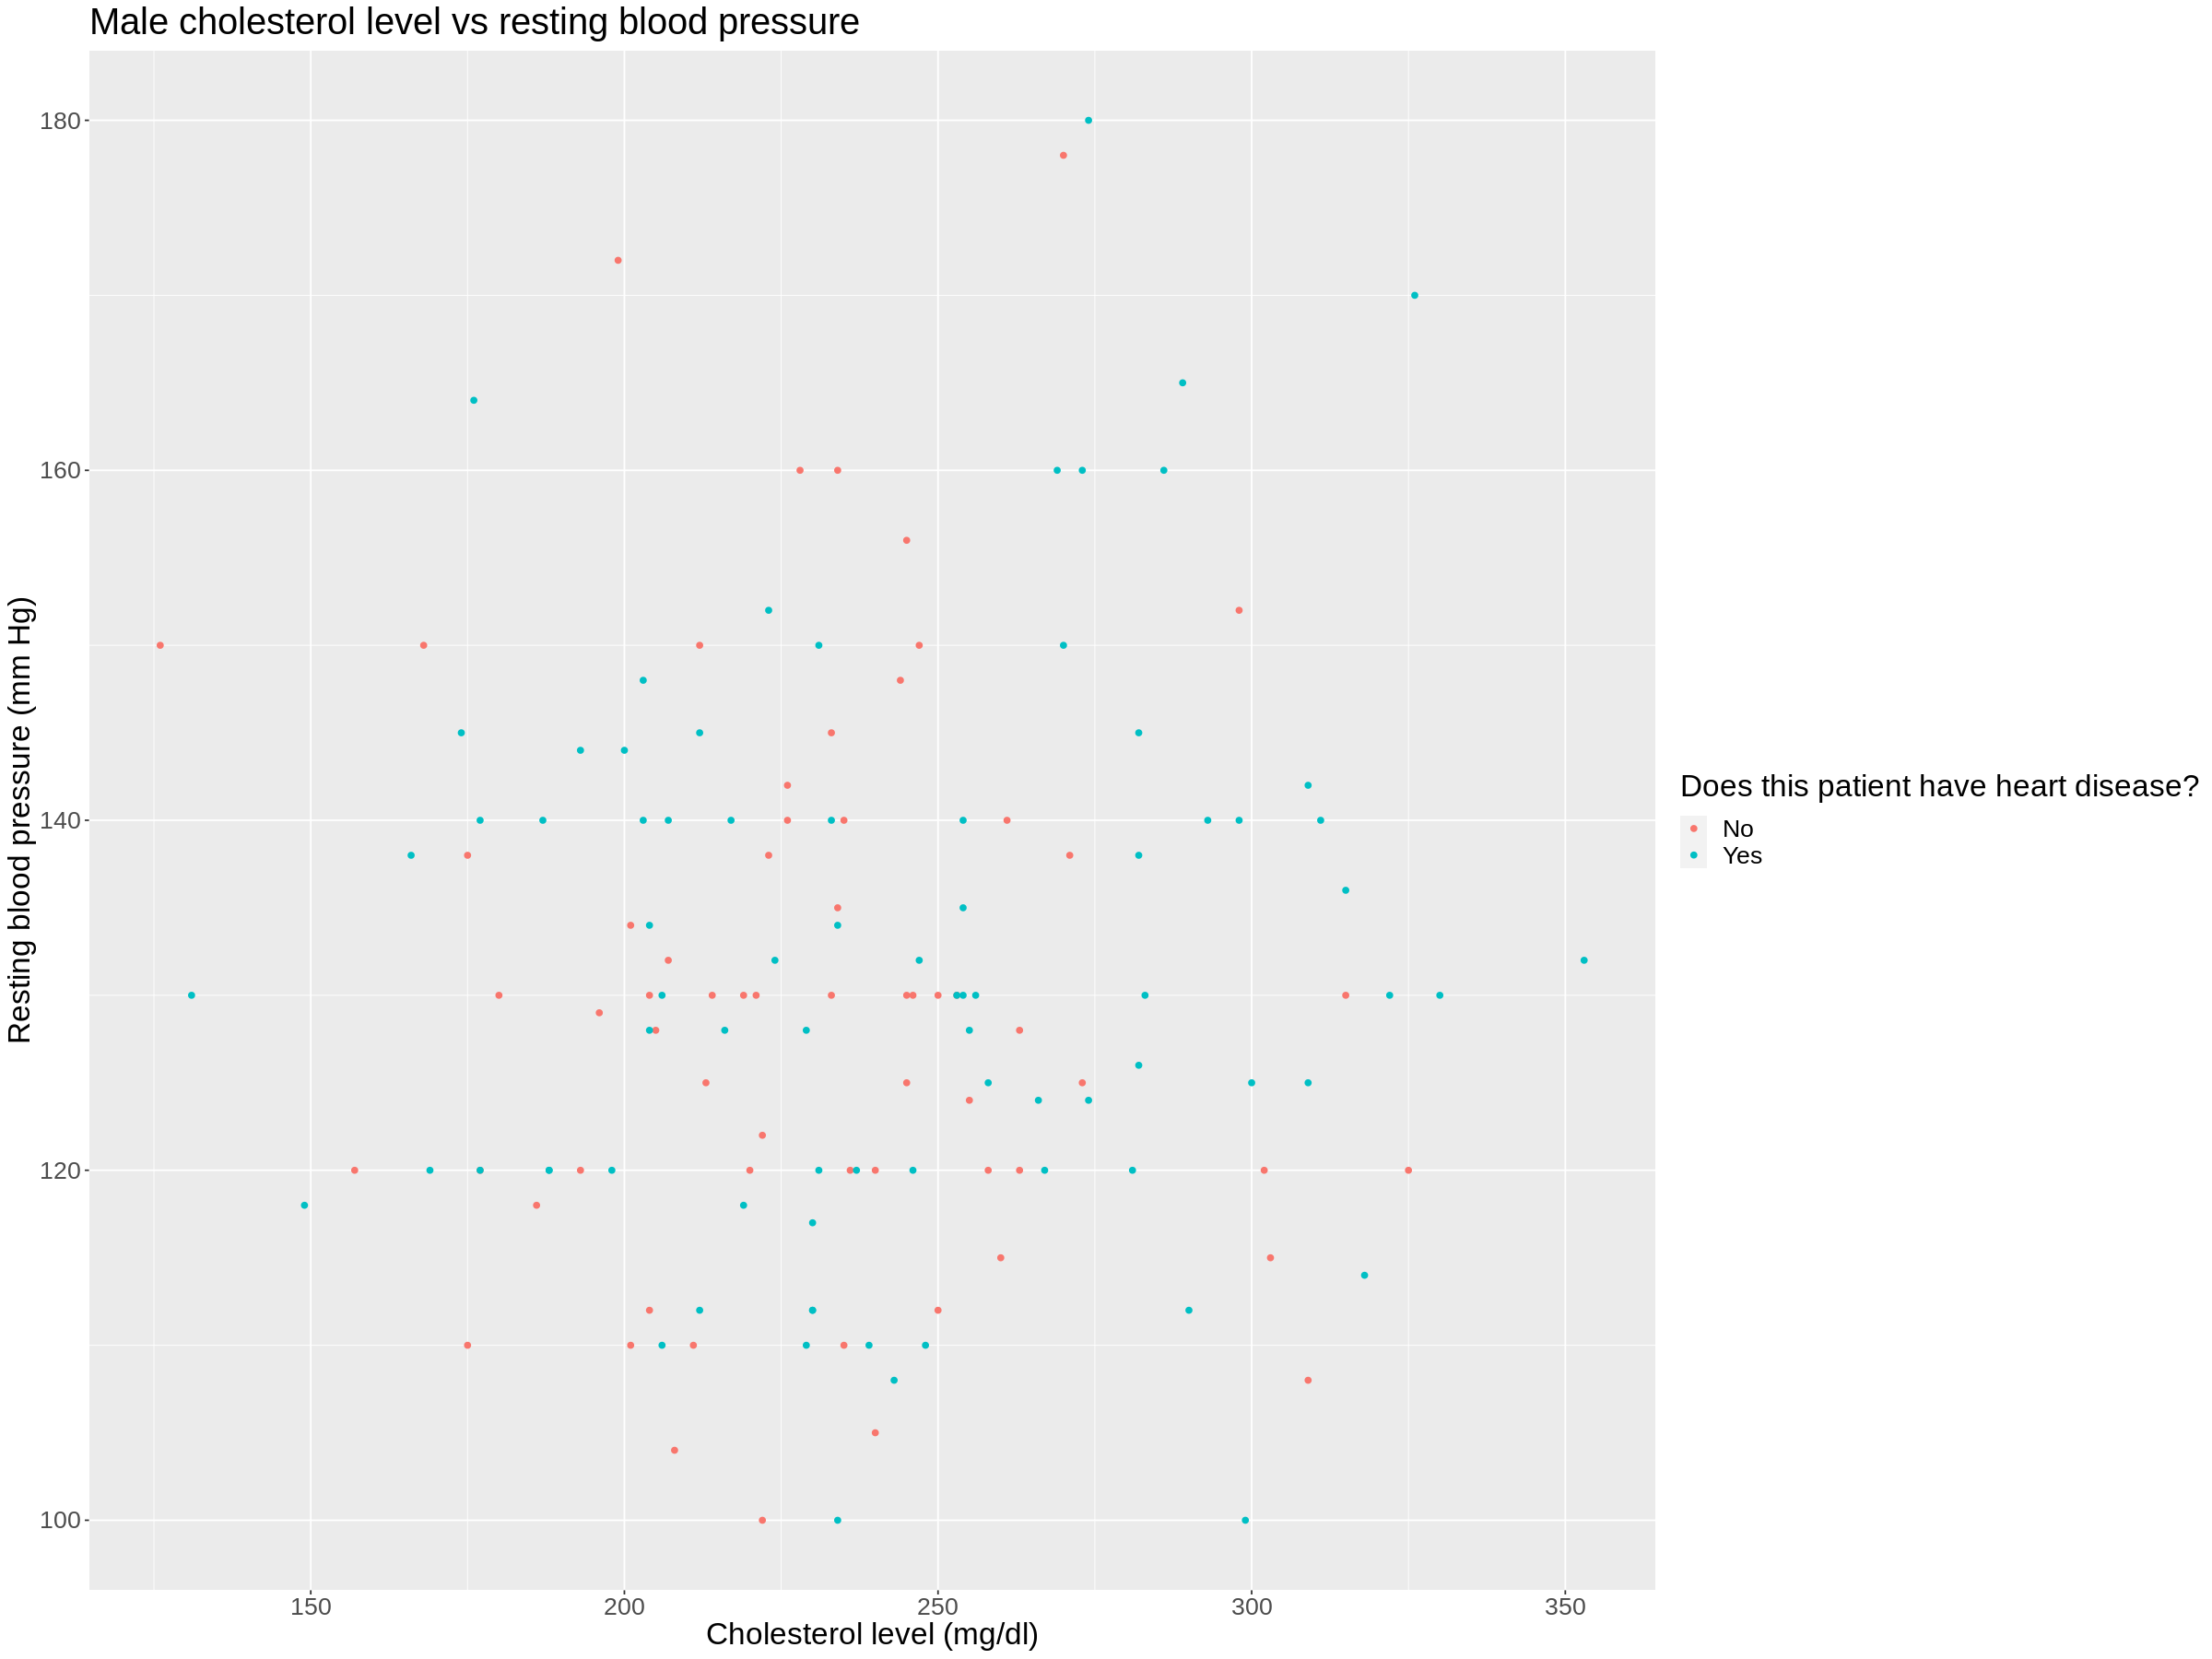

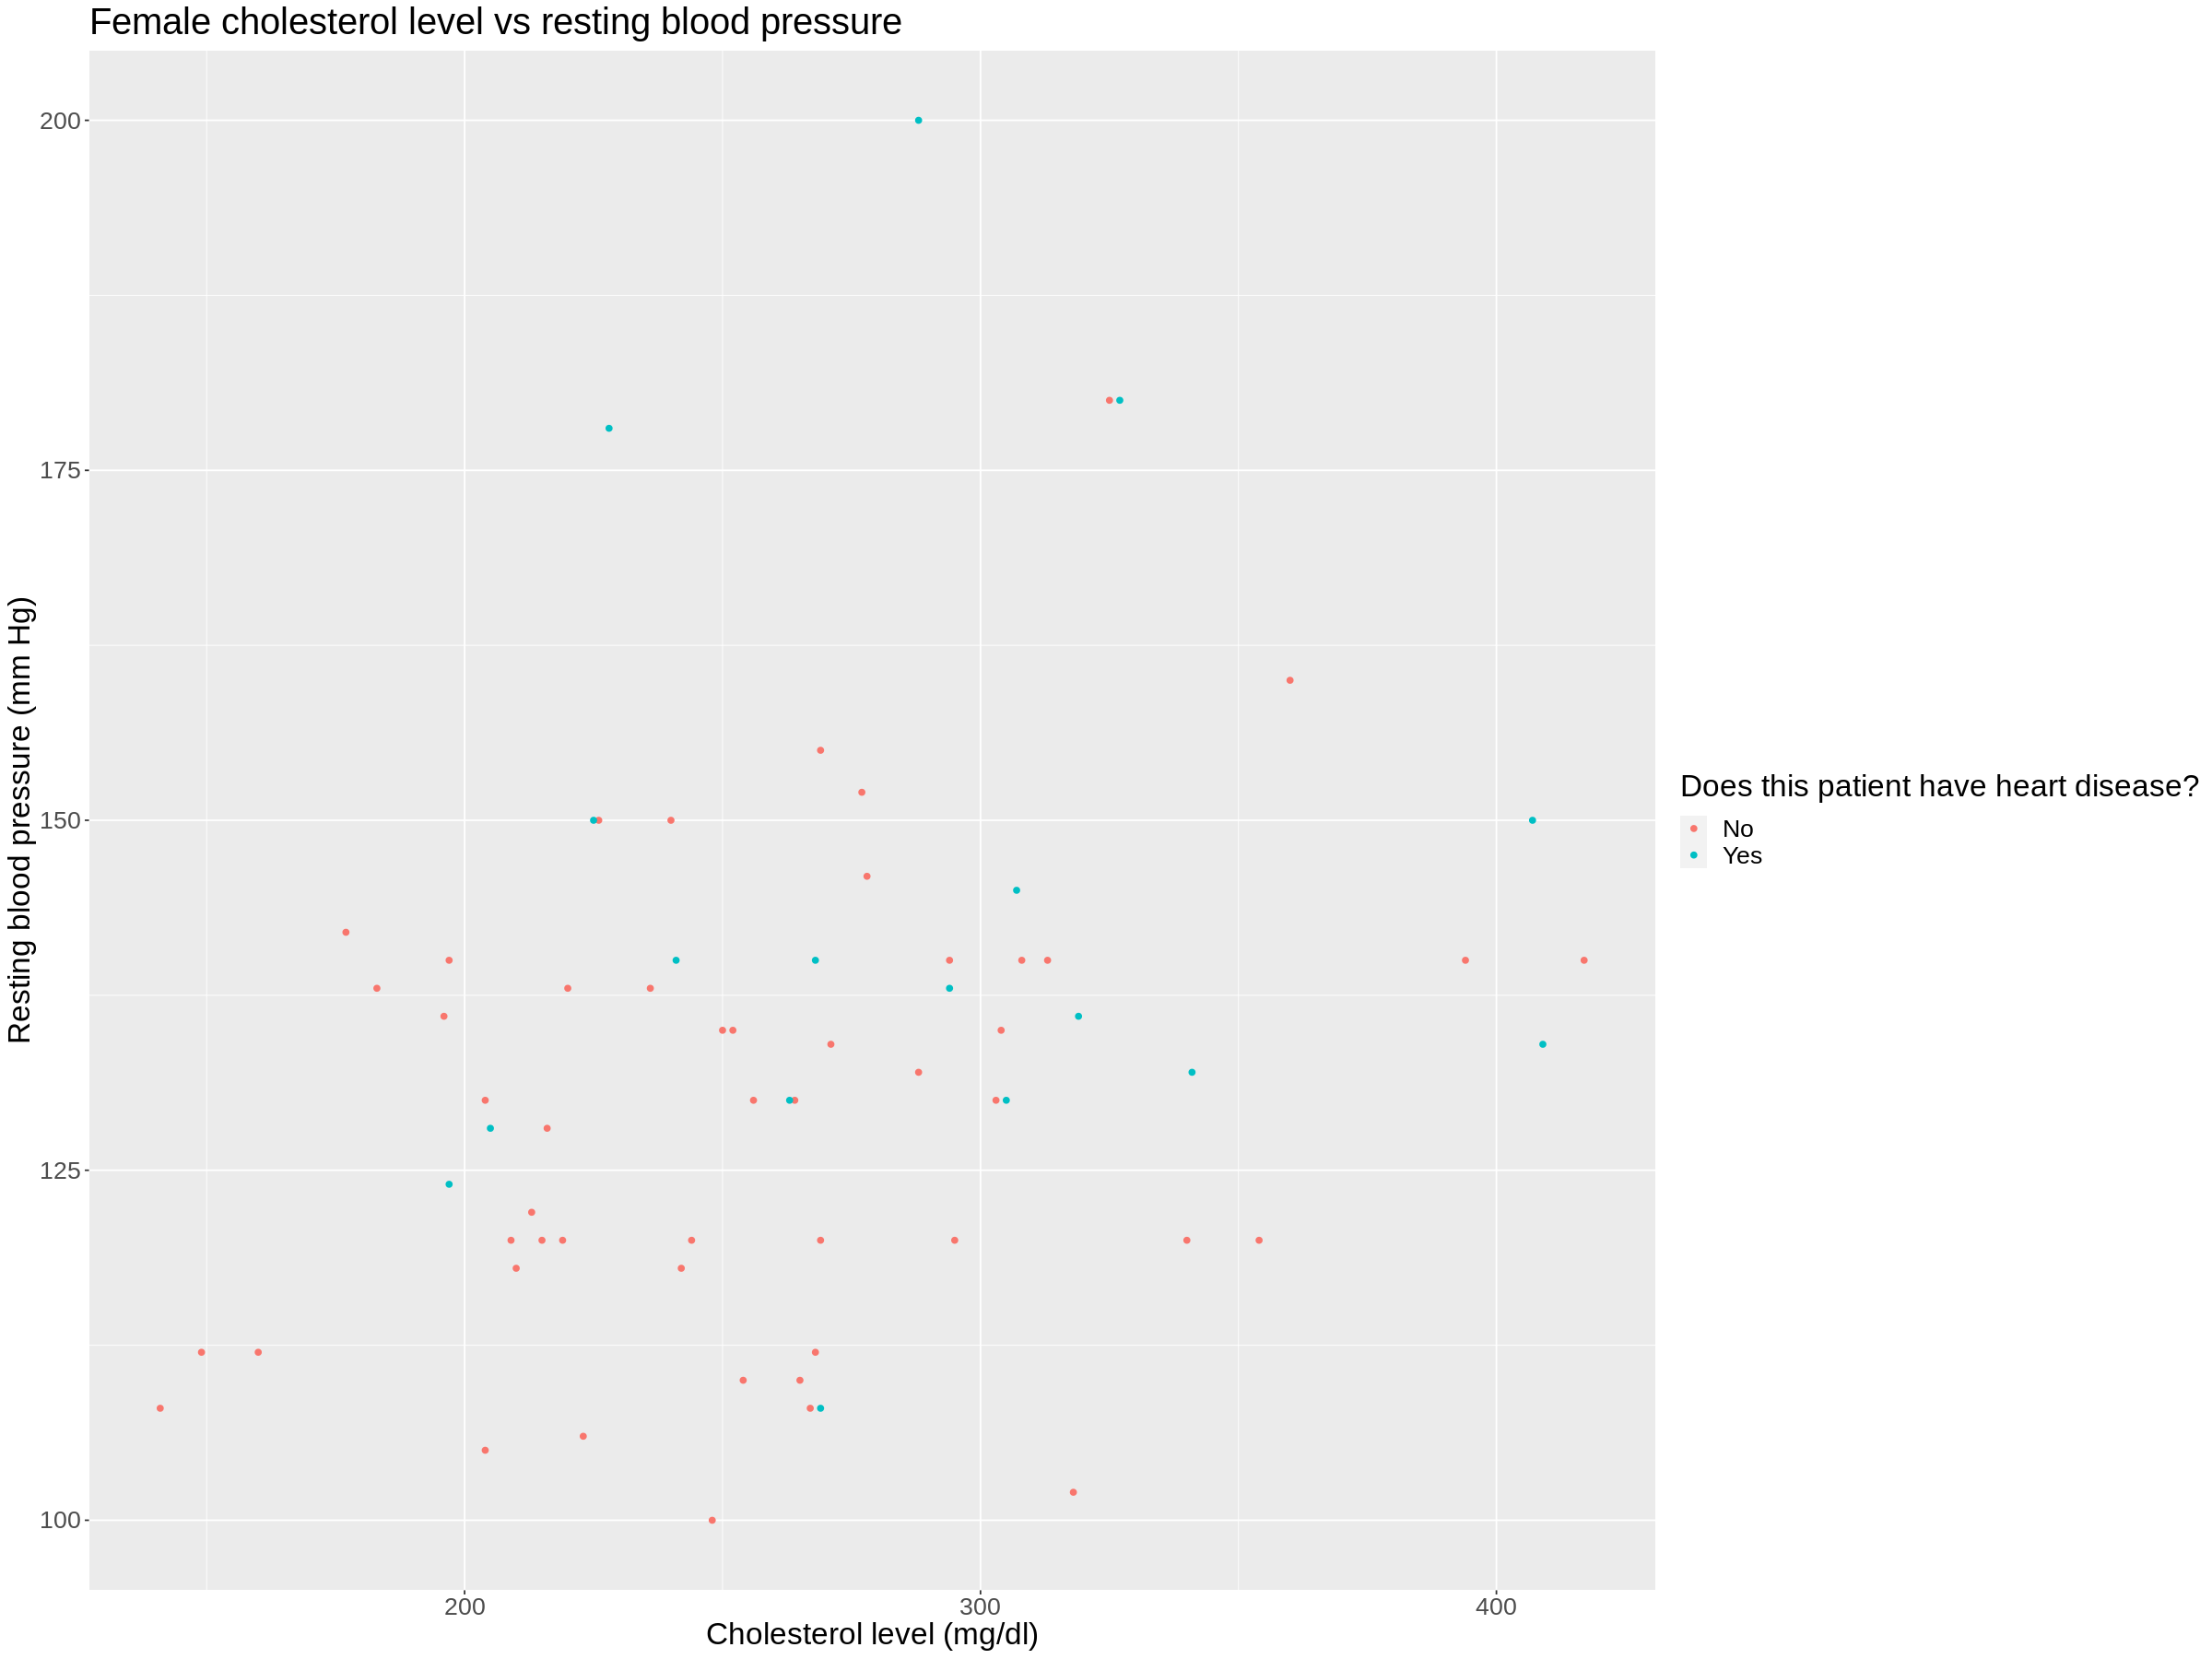

In [4]:
male_split <- initial_split(male_data, prop = 0.70, strata = diagnosis_of_heart_disease)
male_train <- training(male_split)   
male_test <- testing(male_split)

female_split <- initial_split(female_data, prop = 0.70, strata = diagnosis_of_heart_disease)
female_train <- training(female_split)   
female_test <- testing(female_split)

options(repr.plot.width = 20, repr.plot.height = 15)

male_train_plot <- ggplot(data = male_train, aes(x = cholesterol, y = resting_blood_pressure)) +
    geom_point(aes(colour = diagnosis_of_heart_disease)) +
    labs(colour = "Does this patient have heart disease?") +
    ggtitle("Male cholesterol level vs resting blood pressure") +
    xlab("Cholesterol level (mg/dl)") + 
    ylab("Resting blood pressure (mm Hg)") +
    theme(text = element_text(size = 20))

female_train_plot <- ggplot(data = female_train, aes(x = cholesterol, y = resting_blood_pressure)) +
    geom_point(aes(colour = diagnosis_of_heart_disease)) +
    labs(colour = "Does this patient have heart disease?") +
    ggtitle("Female cholesterol level vs resting blood pressure") +
    xlab("Cholesterol level (mg/dl)") + 
    ylab("Resting blood pressure (mm Hg)") +
    theme(text = element_text(size = 20))

male_train_plot
female_train_plot 

## Methods:
*Explain how you will conduct either your data analysis and which variables/columns you will use. Note - you do not need to use all variables/columns that exist in the raw data set. In fact, that's often not a good idea. For each variable think: is this a useful variable for prediction?*

- We will be using resting blood pressure(bp) and serum cholesterol(sc) as predictors, and diagnosis of heart disease as our target variable for our classification. Our data is split into male and female because our preliminary explorations indicates heart disease symptoms are different for the two genders, therefore, we will make 2 k-nearest classification algorithms–one for each sex. We will first set a seed, then we will create a recipe for scaling our bp and sc and set values for predictors (bp and sc) and a value to predict (diagnosis of heart disease). We will then create a model specification, making sure neighbors is set to tune() to find how many neighbors gives the best accuracy for predictions. Then using cross-validation to split our training data into v groups to assess what the optimal K-neighbours we should choose, by combining recipe, model and vfold with a workflow and seeing what k values gives the best accuracy. We can then create a new model with the optimal k and, using another workflow, we can combine the new model with our recipe and fit it to our training datasets. This newest workflow can be used to predict on our testing data, and find the accuracy percentage of our algorithm to tell us if our goal of exceeding 84% accuracy was met our not through a metrics and a confusion matrix. We will do this process twice-once for a model fit to the male training data and tested on the male testing data, and one for the female training and testing data. Afterwards, we would like to test our created models to predict whether one of us or an individual whose data we find online are predicted to have heart disease or not.


*Describe at least one way that you will visualize the results*

- We can visualize our results with a scatter plot of bp vs. sc and colour the point based on its predicted value and shape the points by the actual value to compare the accuracy or non-accuracy of our classification algorithm. Another way we can visualize our results is through histograms, comparing the predicted and actual distribution of heart disease patients for different values of bp and sc.

## Expected outcomes and significance:

*What do you expect to find?*
- We can expect to uncover patients with heart disease tend to possess certain characteristics (ie. high blood pressure and high cholesterol), and whether we can use this possible trend to determine whether a new undiagnosed patient has heart disease.

*What impact could such findings have?*
- Our findings can be used to help diagnose those who may or may not suspect they have heart disease in a potentially more reliable and faster way, and we can also determine a “safe zone” for blood pressure and cholesterol to gauge if a patient falls outside these safe zones and are likely to have heart disease (i.e. having  cholesterol levels close to a heart disease patient’s cholesterol level).

*What future questions could this lead to?*
- Future questions include how and to what extent do other symptoms affect the prediction of having heart disease? What other illnesses can we predict with statistics? Could the need for diagnosis by a doctor eventually become redundant, if computers and statistics can do a better and more accurate job?


## Rerences:

Centers for Disease Control and Prevention. (2022, September 8). Heart disease and stroke. Centers for Disease Control and Prevention. Retrieved October 28, 2022, from https://www.cdc.gov/chronicdisease/resources/publications/factsheets/heart-disease-stroke.htm 

Detrano, R. Heart Disease Data Set. UCI Machine Learning Repository: Heart disease data set. Retrieved October 19, 2022, from https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Wong, C. W., Tafuro, J., Azam, Z., Satchithananda, D., Duckett, S., Barker, D., Patwala, A., Ahmed, F. Z., Mallen, C., &amp; Kwok, C. S. (2021, May 25). Misdiagnosis of heart failure: A systematic review of the literature. Journal of Cardiac Failure. Retrieved October 19, 2022, from https://www.sciencedirect.com/science/article/pii/S1071916421002049#:~:text=Misdiagnosis%20of%20heart%20failure%20ranges,68%25%20depending%20on%20the%20setting.&amp;text=Patients%20with%20ischemic%20heart%20disease,at%20risk%20of%20HF%20misdiagnosis.&amp;text=Patients%20with%20lung%20disease%2C%20stroke,from%20screening%20for%20heart%20failure. 